# Proyecto Final DS_Telecom

<span style="font-size: 1.5em; font-weight: bold;">Código de solución</span>


En este punto vamos a realizar el procesamiento y analisis de los datos.
Dividiremos los tanto de entrenamiento como de analisis.
Evaluaremos los modelos y berificaremos que nuestro resultado esperando obtener arriba de un 70% de presicion.

Anexo tambien la primera parte del proyecto. Para darle seguimiento a la segunda parte.

##  Carga y unión de datos

Se cargan los archivos proporcionados por el proveedor y se unen en un único DataFrame principal.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')

print("CONTRACT DATA")
print(contract.head())
print(contract.info())

CONTRACT DATA
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          

In [3]:
personal = pd.read_csv('/datasets/final_provider/personal.csv')

print("PERSONAL DATA")
print(personal.head())
print(personal.info())

PERSONAL DATA
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


In [4]:
internet = pd.read_csv('/datasets/final_provider/internet.csv')

print("INTERNET DATA")
print(internet.head())
print(internet.info())

INTERNET DATA
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   Inte

In [5]:
phone = pd.read_csv('/datasets/final_provider/phone.csv')

print("PHONE DATA")
print(phone.head())
print(phone.info())


PHONE DATA
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


In [6]:
df = contract.merge(personal, on='customerID', how='left') \
             .merge(internet, on='customerID', how='left') \
             .merge(phone, on='customerID', how='left')

In [7]:
print("\n--- Información general del dataset combinado ---")
print(df.info())
print("\n--- Primeras filas ---")
print(df.head())


--- Información general del dataset combinado ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   obje

In [8]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
df['EndDate'] = df['EndDate'].astype(str)
df['churn'] = df['EndDate'] != 'No'  # True si canceló, False si sigue

## Análisis exploratorio de datos (EDA)

Se analizan las distribuciones de variables categóricas y numéricas en relación con la variable objetivo (`churn`), así como la proporción de cancelaciones.


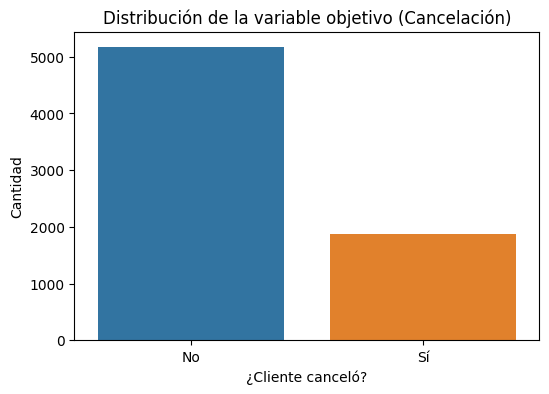

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title('Distribución de la variable objetivo (Cancelación)')
plt.xlabel('¿Cliente canceló?')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

In [10]:
churn_rate = df['churn'].value_counts(normalize=True)
print("\n--- Porcentaje de cancelación ---")
print(churn_rate)


--- Porcentaje de cancelación ---
False    0.73463
True     0.26537
Name: churn, dtype: float64


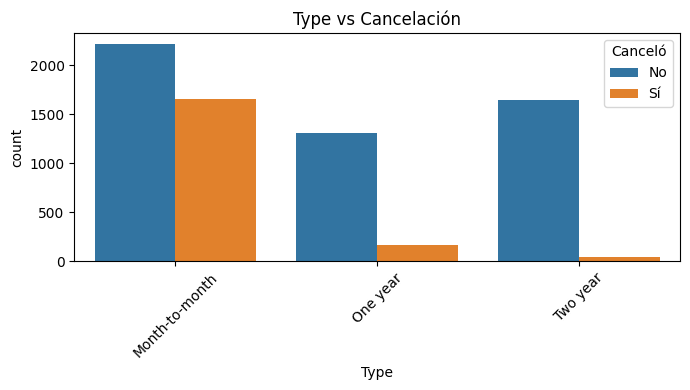

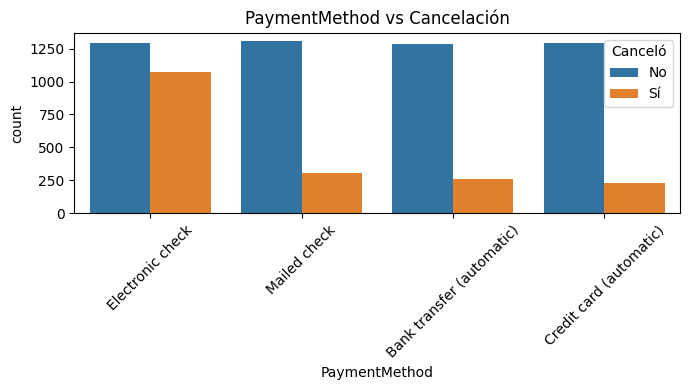

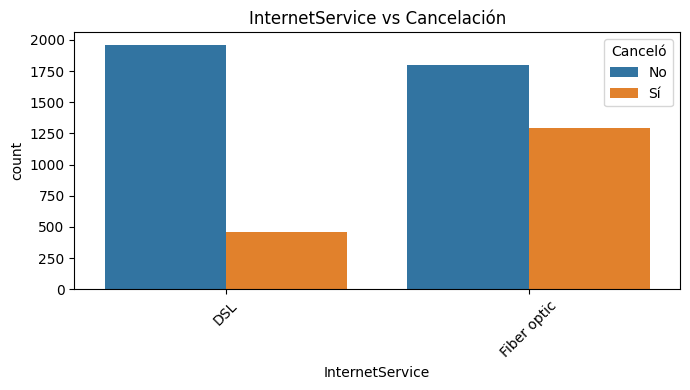

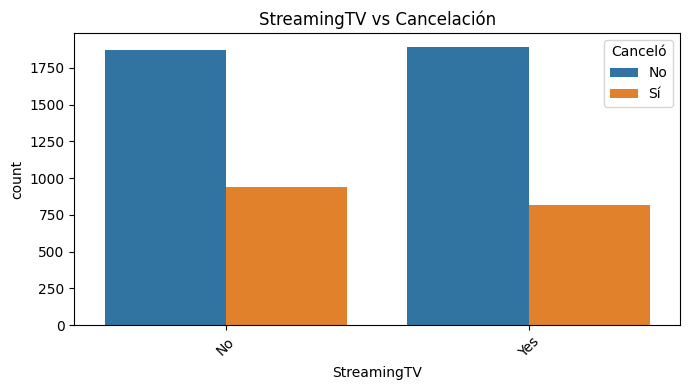

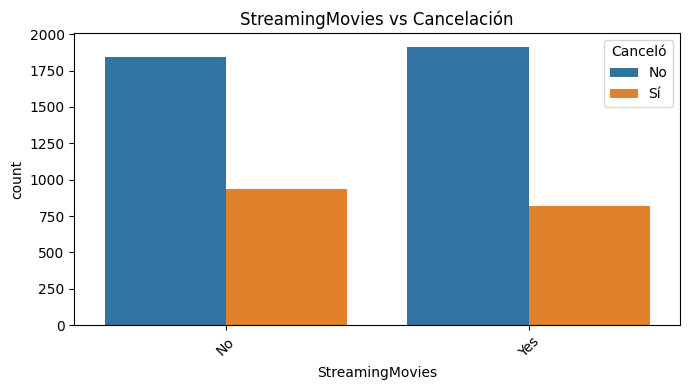

In [11]:
cat_cols = ['Type', 'PaymentMethod', 'InternetService', 'StreamingTV', 'StreamingMovies']
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'{col} vs Cancelación')
    plt.xticks(rotation=45)
    plt.legend(title='Canceló', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

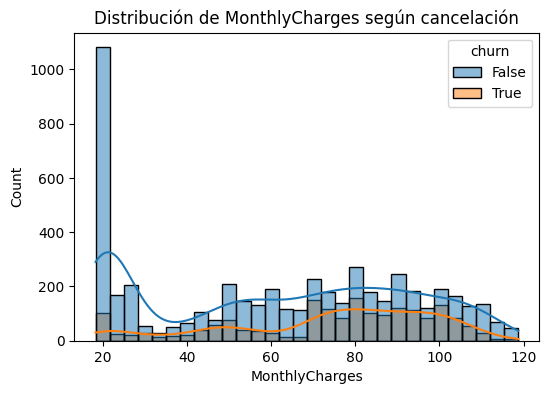

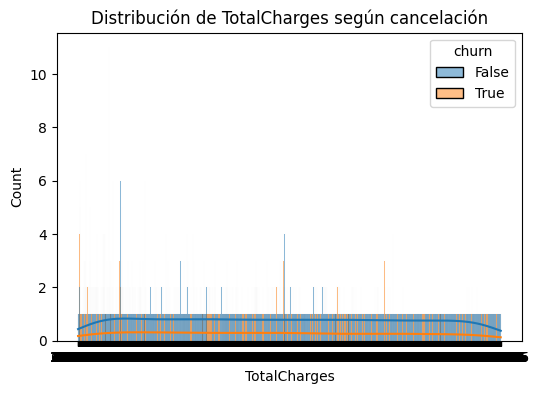

In [12]:
num_cols = ['MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='churn', kde=True, bins=30)
    plt.title(f'Distribución de {col} según cancelación')
    plt.show()

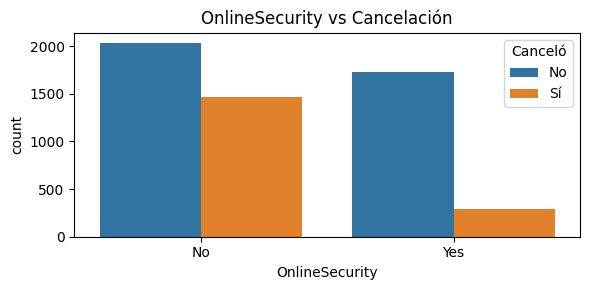

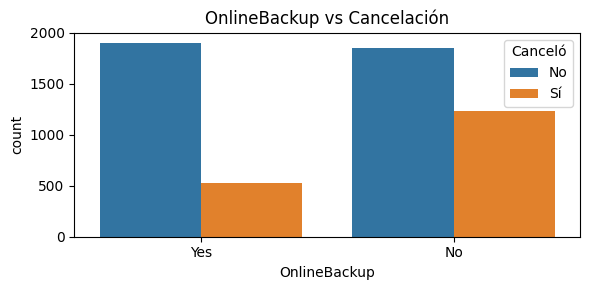

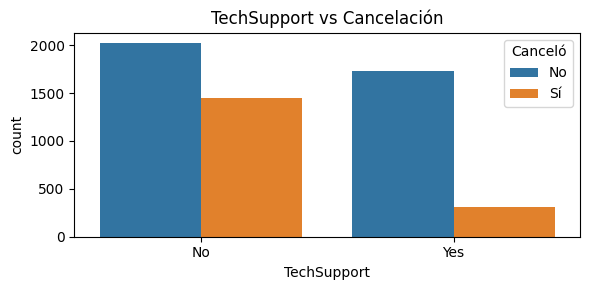

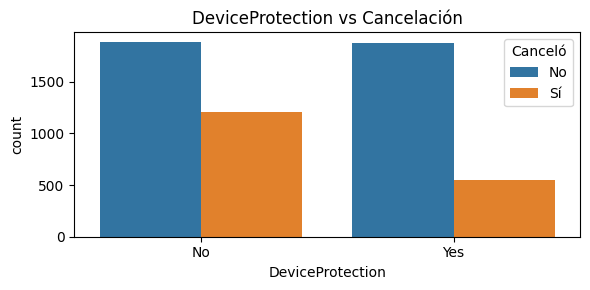

In [13]:
binary_cols = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'DeviceProtection']
for col in binary_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f'{col} vs Cancelación')
    plt.legend(title='Canceló', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

In [14]:
print("\n--- Valores nulos por columna ---")
print(df.isna().sum())


--- Valores nulos por columna ---
customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
churn                  0
dtype: int64


## Preprocesamiento de datos

Conversión de variables categóricas a dummies, manejo de nulos y separación de variables predictoras.


In [15]:
df_model = df.copy()
df_model = df_model.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

In [16]:
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = df_model[col].fillna('missing')
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

In [17]:
X = df_model.drop('churn', axis=1)
y = df_model['churn']

## Entrenamiento y evaluación de modelos

Se entrena y evalúa el desempeño de cuatro modelos: Regresión Logística, Árbol de Decisión, Random Forest y Gradient Boosting. Se utilizan métricas apropiadas como Recall, F1-score y AUC-ROC debido al desbalance de clases.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

In [43]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))


LogisticRegression
              precision    recall  f1-score   support

       False       0.90      0.70      0.79      1294
        True       0.48      0.78      0.60       467

    accuracy                           0.72      1761
   macro avg       0.69      0.74      0.69      1761
weighted avg       0.79      0.72      0.74      1761

AUC-ROC: 0.8196370002879374

DecisionTree
              precision    recall  f1-score   support

       False       0.81      0.81      0.81      1294
        True       0.47      0.48      0.48       467

    accuracy                           0.72      1761
   macro avg       0.64      0.64      0.64      1761
weighted avg       0.72      0.72      0.72      1761

AUC-ROC: 0.6438007406941608

RandomForest
              precision    recall  f1-score   support

       False       0.81      0.89      0.85      1294
        True       0.57      0.43      0.49       467

    accuracy                           0.76      1761
   macro avg       0.69 

## Conclusiones

- La clase positiva (`churn = True`) está desbalanceada, con menor proporción de cancelaciones.
- El análisis muestra que características como el método de pago, el tipo de servicio de internet y cargos mensuales están correlacionados con la cancelación.
- Al evaluar los modelos, la **Regresión Logística con `class_weight='balanced'` obtuvo el mejor rendimiento general**, logrando un mejor equilibrio entre recall y F1-score para la clase minoritaria.
- Aunque el modelo de Gradient Boosting mostró buen desempeño, la Regresión Logística es más simple, más interpretable y adecuada para este problema.
- Para mejorar aún más el modelo, se podría aplicar una técnica de balanceo como sobremuestreo o submuestreo en futuras versiones.
